In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("bank.csv")

In [3]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [4]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int) 

In [5]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [6]:
Y = all_df['deposit'].values.astype('int64')

In [7]:
X.shape

(11162, 7)

In [8]:
X[:5]

array([[ 5.900e+01,  2.343e+03,  5.000e+00,  1.042e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.600e+01,  4.500e+01,  5.000e+00,  1.467e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 4.100e+01,  1.270e+03,  5.000e+00,  1.389e+03,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.500e+01,  2.476e+03,  5.000e+00,  5.790e+02,  1.000e+00,
        -1.000e+00,  0.000e+00],
       [ 5.400e+01,  1.840e+02,  5.000e+00,  6.730e+02,  2.000e+00,
        -1.000e+00,  0.000e+00]])

In [9]:
Y[:5]

array([1, 1, 1, 1, 1])

In [10]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 

In [11]:
train_Features[355:359]

array([[-0.6070719 , -0.2751828 ,  0.04061153,  0.27370403, -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.48418803, -0.54802828, -1.02822609,  1.73144326,  0.18059759,
        -0.48118405, -0.36325984],
       [-0.85890111,  0.13966633, -1.14698582,  2.39981382, -0.55416834,
        -0.48118405, -0.36325984],
       [-0.27129961, -0.12356754, -1.38450529, -0.79511268, -0.18678537,
         0.42913223,  0.0730585 ]])

In [12]:
train_Label[:4]

array([1, 0, 1, 0])

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Dense(units=14*5,  input_dim=7,
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=14*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=14*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=14*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [19]:
model.add(Dense(units=14, 
                kernel_initializer='uniform', 
                activation='relu'))

In [20]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 70)                560       
_________________________________________________________________
dense_2 (Dense)              (None, 56)                3976      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                2394      
_________________________________________________________________
dense_4 (Dense)              (None, 28)                1204      
_________________________________________________________________
dense_5 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 15        
Total params: 8,555
Trainable params: 8,555
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [23]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 7143 samples, validate on 1786 samples
Epoch 1/30
7143/7143 [==============================] - 5s 733us/step - loss: 0.5805 - acc: 0.6706 - val_loss: 0.4935 - val_acc: 0.7609
Epoch 2/30
7143/7143 [==============================] - 3s 449us/step - loss: 0.4878 - acc: 0.7704 - val_loss: 0.4794 - val_acc: 0.7744
Epoch 3/30
7143/7143 [==============================] - 3s 436us/step - loss: 0.4809 - acc: 0.7775 - val_loss: 0.4812 - val_acc: 0.7749
Epoch 4/30
7143/7143 [==============================] - 3s 450us/step - loss: 0.4776 - acc: 0.7782 - val_loss: 0.4844 - val_acc: 0.7716


In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

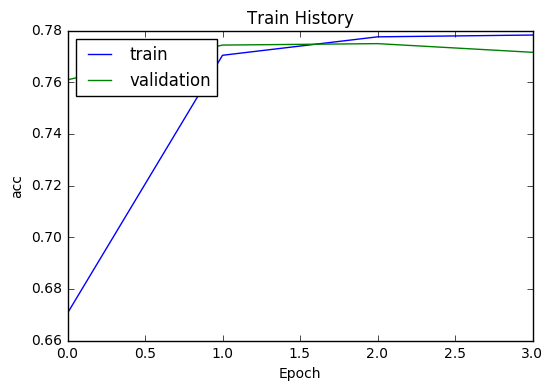

In [25]:
show_train_history(train_history,'acc','val_acc')

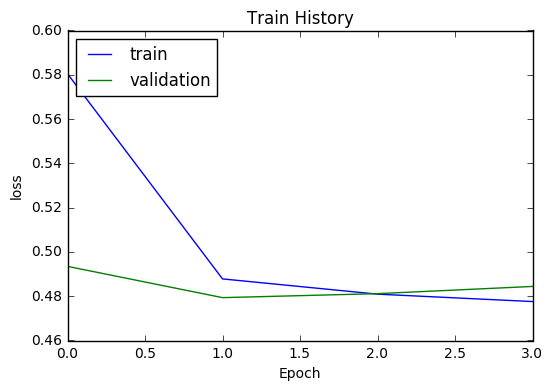

In [26]:
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 148us/step


In [28]:
scores[1]

0.7886251676418938